trying to clasify the type of wine based on the ingredients present

In [2]:
from sklearn.datasets import load_wine

wine_data = load_wine()

In [3]:
X = wine_data.data
y = wine_data.target

feature_names = wine_data.feature_names
target_names = wine_data.target_names

In [4]:
print(f"Feature names: {feature_names}")
print(f"Target names: {target_names}")

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']


In [5]:
print(type(X))

<class 'numpy.ndarray'>


this is numpy array of n dimension, convert to pandas dataframe first to use describe, head, etc...

In [6]:
import pandas as pd

df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target
df['wine_class'] = df['target'].apply(lambda x: wine_data.target_names[x])

In [7]:
df.iloc[8]

alcohol                           14.83
malic_acid                         1.64
ash                                2.17
alcalinity_of_ash                  14.0
magnesium                          97.0
total_phenols                       2.8
flavanoids                         2.98
nonflavanoid_phenols               0.29
proanthocyanins                    1.98
color_intensity                     5.2
hue                                1.08
od280/od315_of_diluted_wines       2.85
proline                          1045.0
target                                0
wine_class                      class_0
Name: 8, dtype: object

In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [9]:
print(df.columns)

df.groupby('target').mean(numeric_only=True)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target', 'wine_class'],
      dtype='object')


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


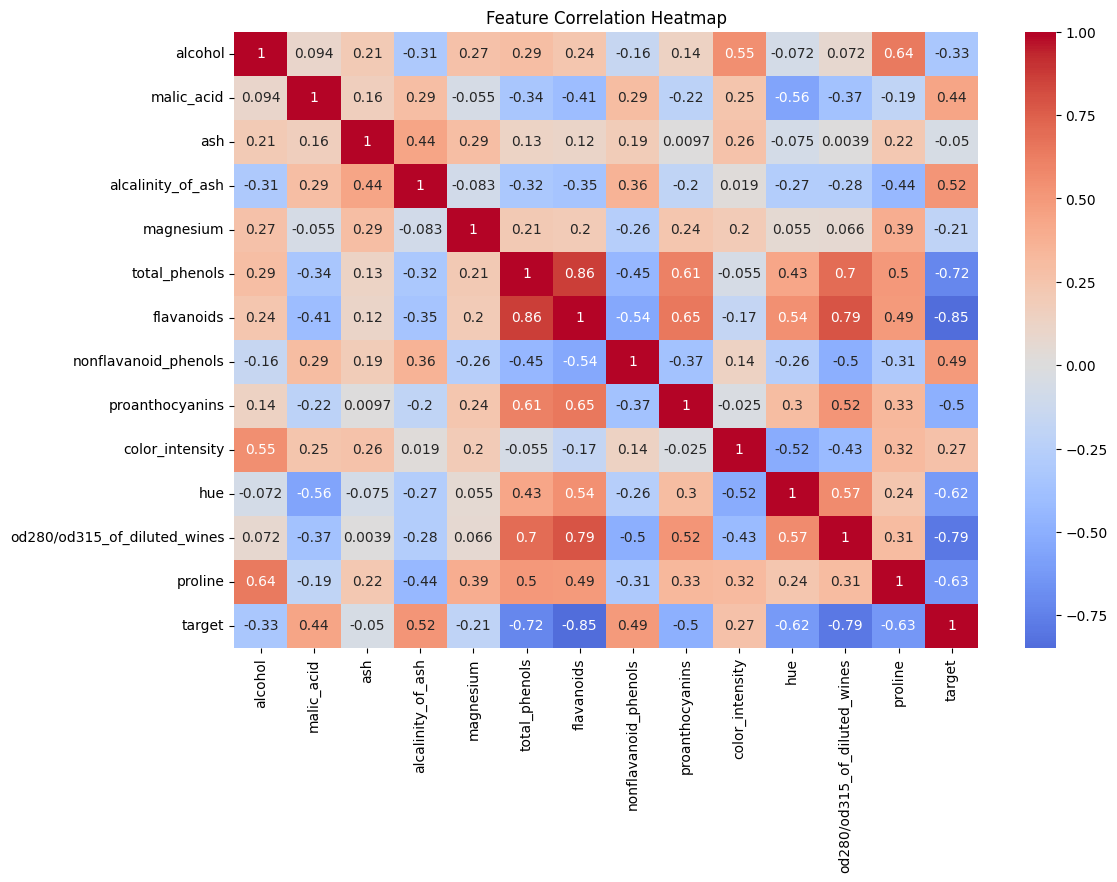

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [11]:
attributes = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target']
    
df[attributes].corr()['target'].sort_values(ascending=False)

target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64

In [12]:
X = wine_data.data
y = wine_data.target

feature_indices = [3,5,6,10,11,12]
X_trained = X[:,feature_indices]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trained, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rndm_frst = RandomForestClassifier(random_state=42)
dcsn_tree = DecisionTreeClassifier(max_depth=5)

rndm_frst.fit(X_train, y_train)
dcsn_tree.fit(X_train, y_train)

rndom_pred = rndm_frst.predict(X_test)
dcsn_pred = dcsn_tree.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

# acc_rndm = accuracy_score(y_test, rndom_pred)
# acc_dcsn = accuracy_score(y_test, dcsn_pred)

# print(f"Accuracy score:\nRandom Forest: {acc_rndm:.3f}\nDecision Tree:{acc_dcsn:.3f}")

# rec_rndm = recall_score(y_test, rndom_pred, average="macro")
# rec_dcsn = recall_score(y_test, dcsn_pred, average="macro")

# print(f"Recall score:\nRandom Forest: {rec_rndm:.3f}\nDecision Tree:{rec_dcsn:.3f}")

# cm_rndm = confusion_matrix(y_test, rndom_pred)
# cm_dcsn = confusion_matrix(y_test, dcsn_pred)
# print(f"Confusion Matrix:\nRandom Forest: \n{cm_rndm}\nDecision Tree:\n{cm_dcsn}")

print(f"Classification report:\nRandom Forest:\n{classification_report(y_test, rndom_pred)}\nDecision Tree:\n{classification_report(y_test, dcsn_pred)}")

Classification report:
Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

Decision Tree:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.79      0.79      0.79        14
           2       0.83      0.62      0.71         8

    accuracy                           0.83        36
   macro avg       0.83      0.80      0.81        36
weighted avg       0.83      0.83      0.83        36

